In [3]:
# data manipulation tools
import pandas as pd
import numpy as np

# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#import plotly.express as px

# statistics librabry
from scipy import stats
import statistics as  stat

# database connections
import pyodbc    
from dotenv import dotenv_values

# machine learning libraries
import sklearn
from sklearn.impute import SimpleImputer

# hide warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:
# setup connection
connector = pyodbc.connect(connection_string)

## DATA UNDERSTANDING

### Data for the project
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Data Dictionary

| Feature           | Description                                                |
|-------------------|------------------------------------------------------------|
| Gender            | Whether the customer is a male or a female                 |
| SeniorCitizen     | Whether a customer is a senior citizen or not              |
| Partner           | Whether the customer has a partner or not (Yes, No)        |
| Dependents        | Whether the customer has dependents or not (Yes, No)       |
| Tenure            | Number of months the customer has stayed with the company |
| Phone Service     | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines     | Whether the customer has multiple lines or not            |
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)|
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet)|
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet)|
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service)|
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet)|
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service)|
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year)|
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)|
| Payment Method    | The customer's payment method (Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))|
| MonthlyCharges    | The amount charged to the customer monthly                |
| TotalCharges      | The total amount charged to the customer                   |
| Churn             | Whether the customer churned or not (Yes or No), ** target variable           |

### Load Dataset

In [6]:
# query the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query,connector)

In [7]:
# loading the excel dataset 
df_2 = pd.read_csv("Data/LP2_Telco-churn-second-2000.csv")
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
# check for column names
df_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# check for column names
df_2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# concatenate data
master_df = pd.concat([df_1,df_2],ignore_index=True)
master_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
# Checking the shape of the data
master_df.shape

(5043, 21)

In [13]:
# Checking for info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [14]:
# Checking for duplication 
master_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [15]:
# Checking for sum fo duplicates
master_df.duplicated().sum()

0

In [16]:
# Checking for nunique
master_df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [17]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in master_df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((master_df[col].dtype == 'object') or (master_df[col].dtype == 'bool')) and (col != 'customerID'):
            # Print the column name and its unique values
            print(col, '---->', master_df[col].unique())

In [18]:
# Call the function to check unique values for the dataFrame
check_unique_values(master_df)

Checking unique values in categorical columns:
gender ----> ['Female' 'Male']
Partner ----> [True False 'No' 'Yes']
Dependents ----> [False True 'No' 'Yes']
PhoneService ----> [False True 'Yes' 'No']
MultipleLines ----> [None False True 'No' 'No phone service' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [False True None 'No' 'Yes' 'No internet service']
OnlineBackup ----> [True False None 'No' 'Yes' 'No internet service']
DeviceProtection ----> [False True None 'No' 'Yes' 'No internet service']
TechSupport ----> [False True None 'Yes' 'No' 'No internet service']
StreamingTV ----> [False True None 'No' 'Yes' 'No internet service']
StreamingMovies ----> [False True None 'No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [True False 'Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ----> [29.850000381469727 188

In [15]:
# Checking for missing values 
master_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [17]:
# Checking for percentage of missing values 
(master_df.isnull().sum()/(len(master_df)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

<Axes: >

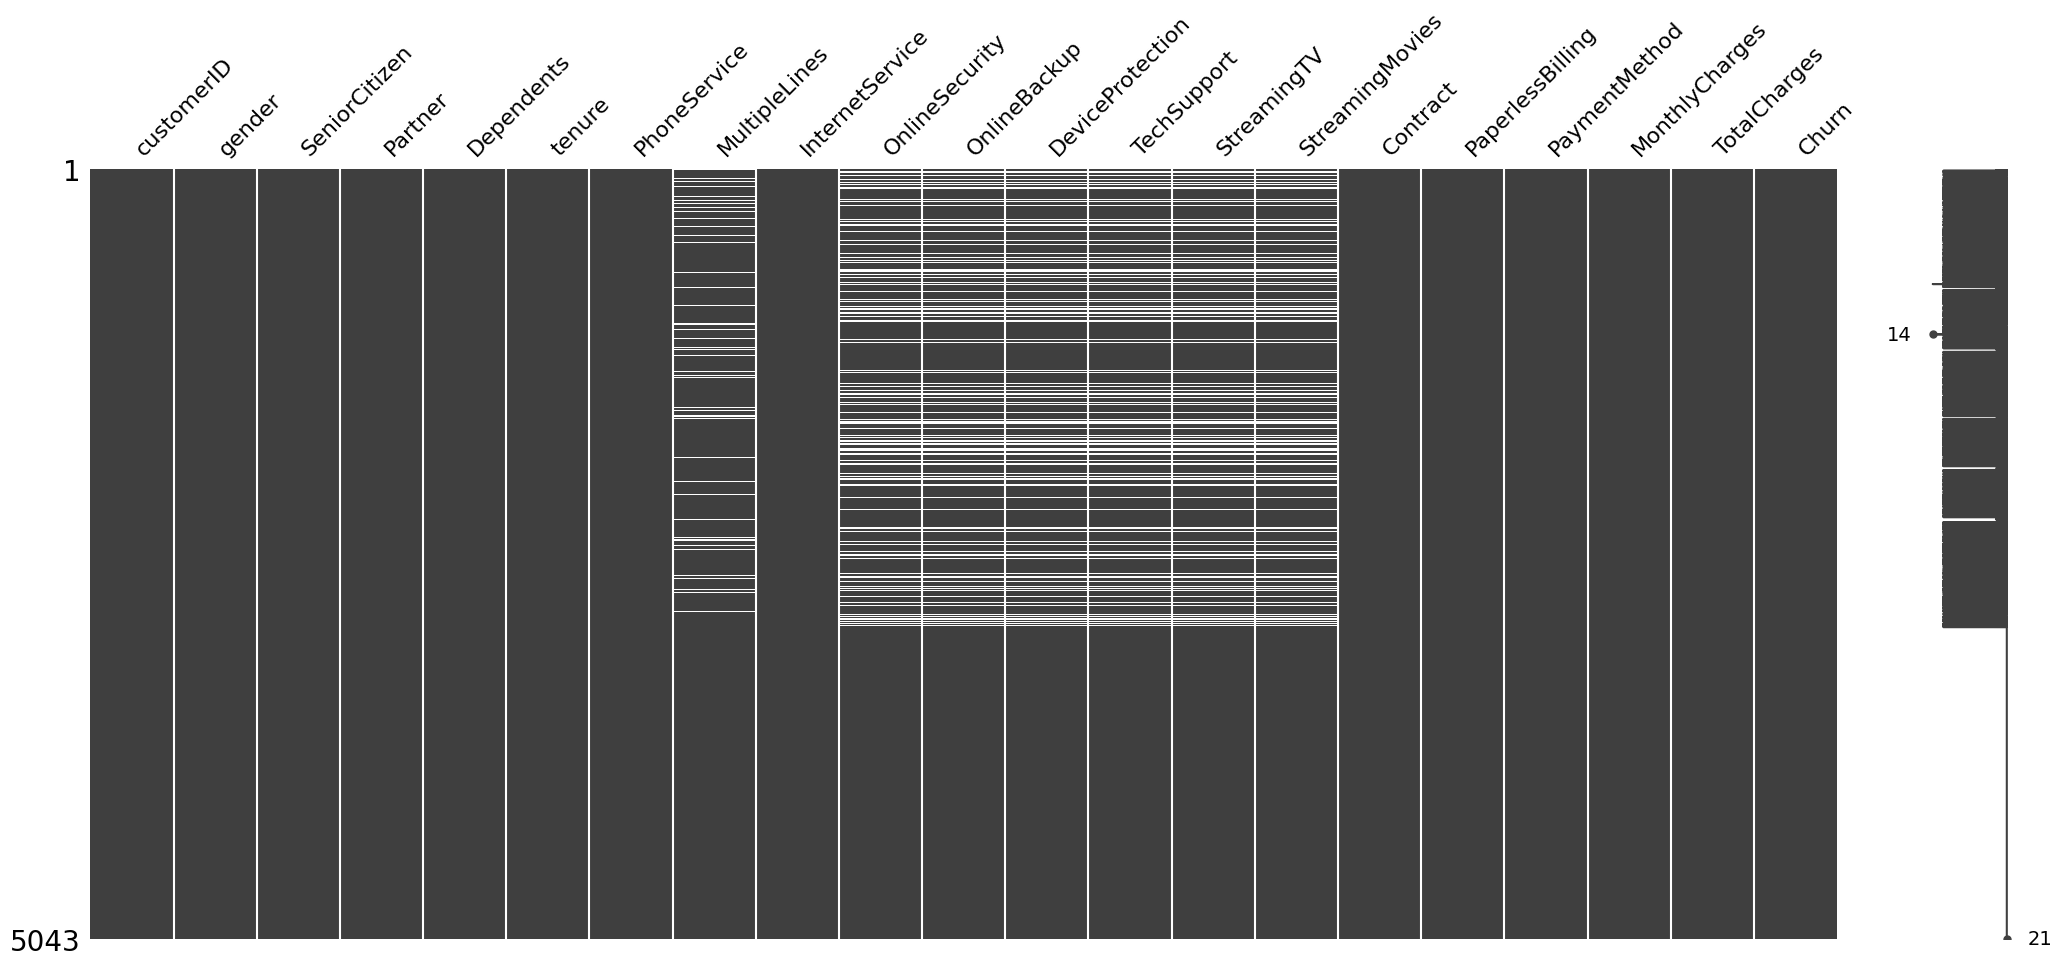

In [21]:
# Visualize missing data pattern using matrix plot
msno.matrix(master_df)

In [ ]:
### Data Preprpcessing

In [19]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
master_df['TotalCharges'] = pd.to_numeric(master_df['TotalCharges'], errors='coerce')

In [20]:
# Verify the data type after conversion
master_df['TotalCharges'].dtype

dtype('float64')

In [21]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'OnlineSecurity': {True: 'Yes', False: 'No', None: 'No internet service'},
    'OnlineBackup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'DeviceProtection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'TechSupport': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingTV': {True: 'Yes', False: 'No', None: 'No internet service'},
    'StreamingMovies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'Churn': {True: 'Yes', False: 'No', None: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'},
    'SeniorCitizen': {True: 1, False: 0}  # Convert True to 1 and False to 0
}

In [22]:
# Replace old categories with te new ones
master_df.replace(new_cat_values_mapping, inplace=True)

In [23]:
# Confirm changes
check_unique_values(master_df)

Checking unique values in categorical columns:
gender ----> ['Female' 'Male']
Partner ----> ['Yes' 'No']
Dependents ----> ['No' 'Yes']
PhoneService ----> ['No' 'Yes']
MultipleLines ----> ['No phone service' 'No' 'Yes']
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> ['No' 'Yes' 'No internet service']
OnlineBackup ----> ['Yes' 'No' 'No internet service']
DeviceProtection ----> ['No' 'Yes' 'No internet service']
TechSupport ----> ['No' 'Yes' 'No internet service']
StreamingTV ----> ['No' 'Yes' 'No internet service']
StreamingMovies ----> ['No' 'Yes' 'No internet service']
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> ['Yes' 'No']
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ----> ['No' 'Yes']


In [24]:
# Check info after basic cleaning
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [25]:
# Descriptive statistics of the master_df dataset
master_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5035.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2269.483576
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,417.675003
50%,0.000000,29.000000,70.550003,1401.150024
75%,0.000000,56.000000,90.050003,3862.000000
max,1.000000,72.000000,118.650002,8670.100000


The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

### Univariate Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

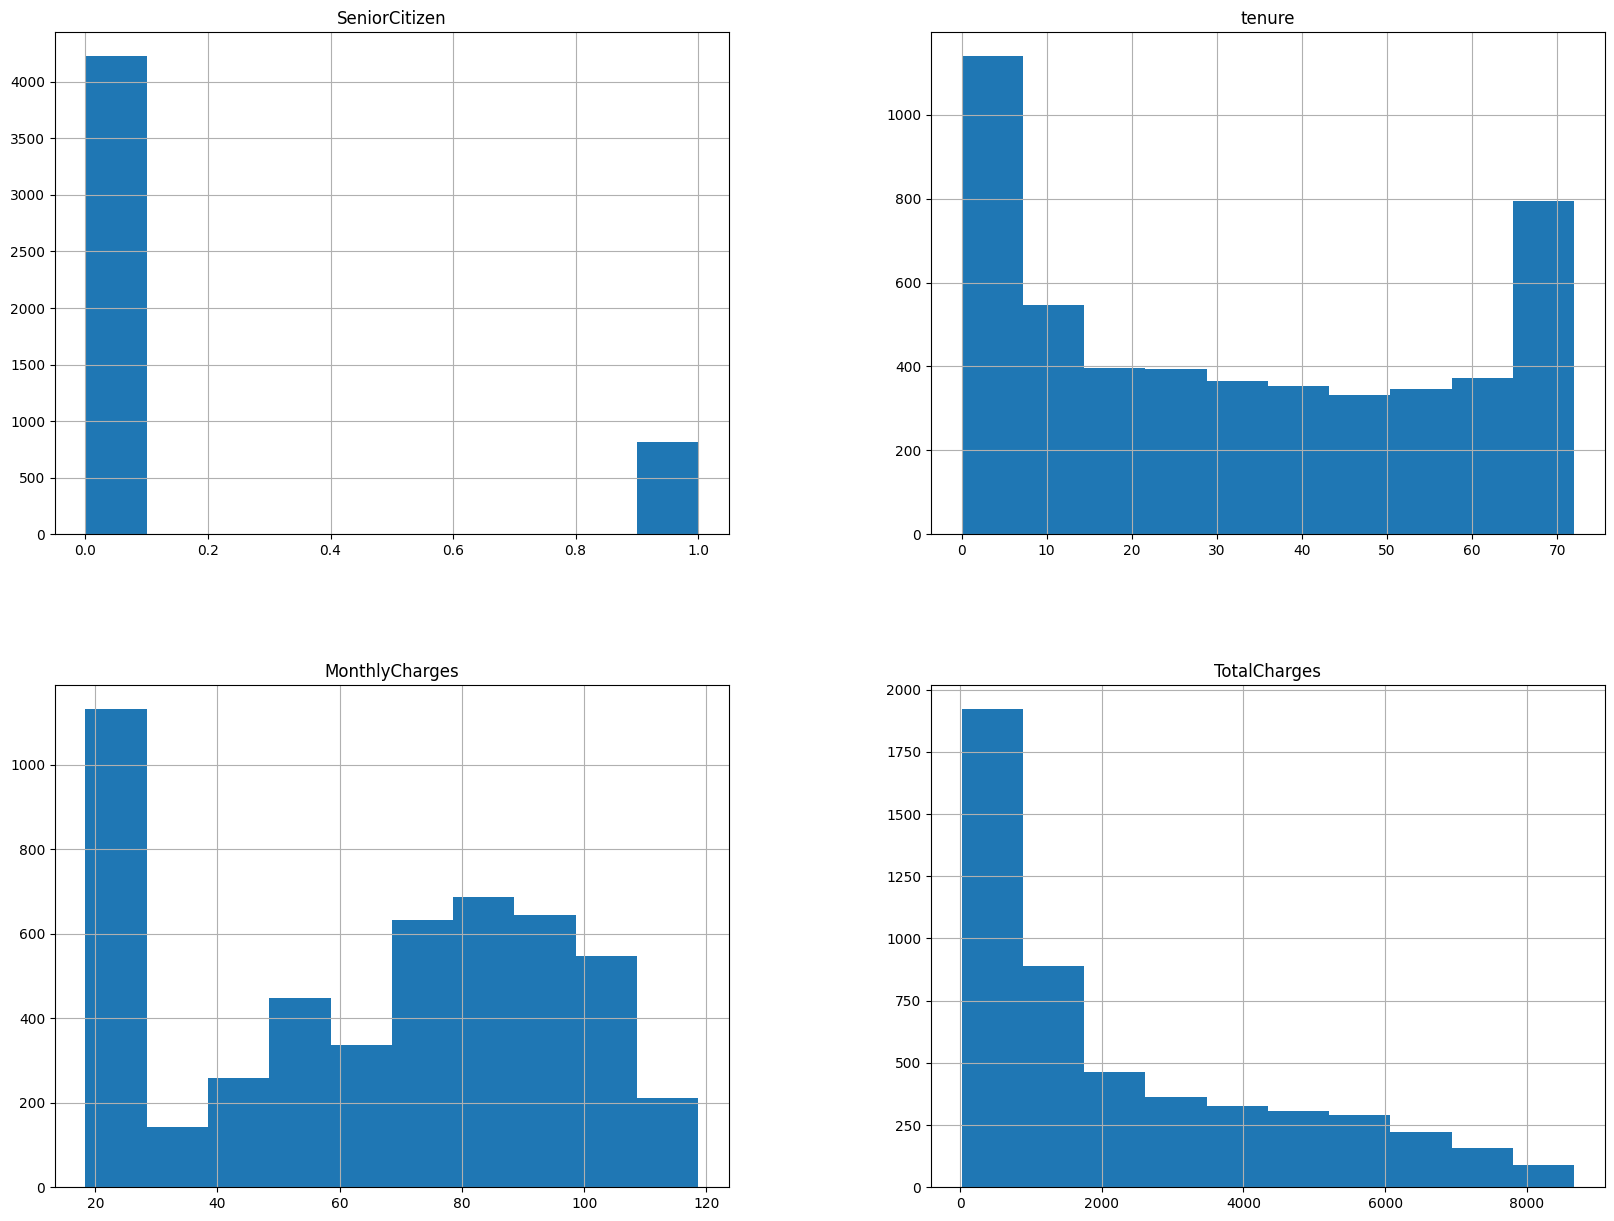

In [26]:
# Visualize the Distribution of the variables
master_df.hist(figsize=(20, 15))

In [30]:
# Ananlyze the Churn column

master_df["Churn"].value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

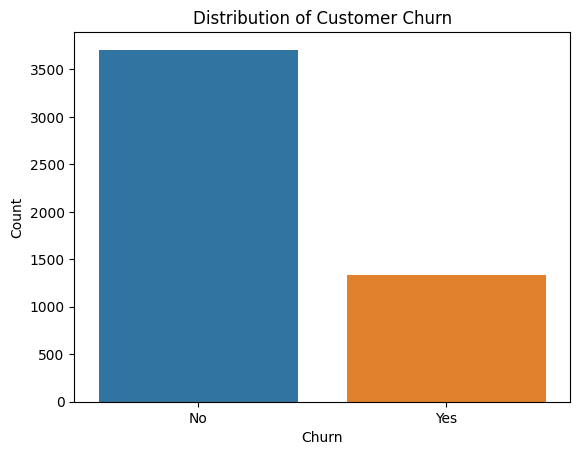

In [32]:
sns.countplot(x='Churn', data=master_df, color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])
plt.title("Distribution of Customer Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

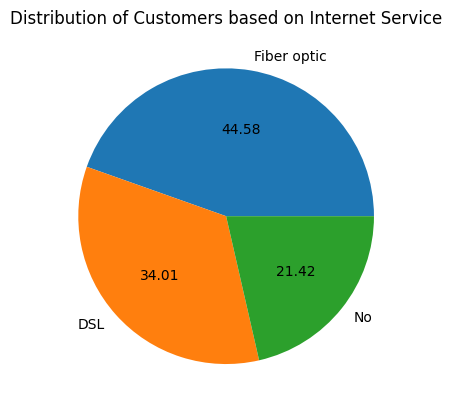

In [33]:
# # Ananlyze the InternetService column
plt.pie(x=master_df['InternetService'].value_counts().values,labels=master_df['InternetService'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Customers based on Internet Service')
plt.show()

### Bivariate Analysis

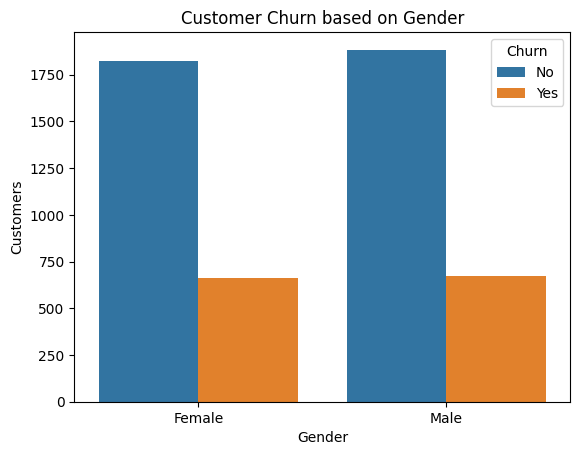

In [35]:
# Relationship beyween Customer Churn and Gender
sns.countplot(data=master_df,x='gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Customers')
plt.title('Customer Churn based on Gender')
plt.show()

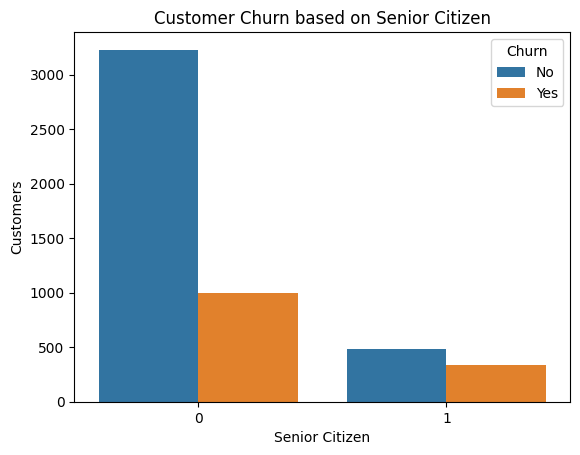

In [37]:
# Relationship between Churn and SeniorCitizen
sns.countplot(data=master_df, x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()

In [39]:
# Relationship between numeric columns
master_df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


### Multivariate Analysis